# IMPORTING THE DATA

In [2]:
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'
from urllib.request import urlretrieve
urlretrieve(medical_charges_url, 'medical.csv')
import pandas as pd
medical_df= pd.read_csv('medical.csv')
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# ANALYZING DATA


In [5]:
!pip install plotly matplotlib seaborn

In [6]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
%matplotlib inline

In [7]:
sns.set(style="whitegrid")
matplotlib.rcParams['figure.figsize'] = (12, 6)
matplotlib.rcParams['font.size'] = 14


In [19]:
fig = px.histogram(medical_df, x='age', marginal='box', nbins=47, title='Age Distribution of Patients')
fig.update_layout(bargap=0.1)
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [ ]:
fig = px.histogram(medical_df, x='bmi', marginal='box', color_discrete_sequence=['red'], title='BMI Distribution of Patients')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
fig = px.histogram(medical_df, x='charges', marginal='box', color='smoker', color_discrete_sequence=['green', 'grey'], title='Charges Distribution of Patients')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
fig = px.histogram(medical_df, x='sex', color_discrete_sequence=['red'], title='BMI Distribution of Patients')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
fig = px.histogram(medical_df, x='region', color_discrete_sequence=['red'], title='BMI Distribution of Patients')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
medical_df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [ ]:
px.histogram(medical_df, x='smoker', color='sex' , title = 'smoker')

In [ ]:
px.scatter(medical_df, x='age', y='charges', color='smoker', hover_data=['sex'], title='AGE vs Charges')

In [ ]:
px.scatter(medical_df, x='bmi', y='charges', color='smoker', hover_data=['sex'], title='BMI vs Charges')

In [20]:
medical_df.charges.corr(medical_df.age)

0.2990081933306477

In [21]:
medical_df.charges.corr(medical_df.bmi)

0.19834096883362887

In [22]:
smoker_values = {'yes': 1, 'no': 0}
smoker_numeric = medical_df.smoker.map(smoker_values)
smoker_numeric

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [23]:
medical_df.charges.corr(smoker_numeric)

0.7872514304984771

In [24]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

# STARTING SCIKIT-LEARN


## LINEAR REGRESSION

In [27]:
!pip install scikit-learn

In [28]:
from sklearn.linear_model import LinearRegression  

In [29]:
model = LinearRegression()
inputs = non_smoker_df[['age']]
targets = non_smoker_df['charges']
model.fit(inputs, targets)

LinearRegression()

In [31]:
model.predict([[18]])

c:\Users\abdul.DESKTOP-7C38D8K\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([2719.0598744])

In [33]:
predicted_charges = model.predict(inputs)
predicted_charges

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# ORDINARY LEAST SQUARES

rmse = np.sqrt(mean_squared_error(targets, predicted_charges))
rmse


4662.505766636395

In [38]:
model.coef_

array([267.24891283])

In [39]:
model.intercept_

-2091.420556565079

In [ ]:
from sklearn.linear_model import SGDRegressor

# Using Stochastic Gradient Descent for Linear Regression
# STOCHASTIC GRADIENT DESCENT: 

model = SGDRegressor()
model.fit(inputs, targets)
predicted_charges = model.predict(inputs)
rmse = np.sqrt(mean_squared_error(targets, predicted_charges))
rmse


5119.401767747455

In [ ]:
# Machine Learning is simply a set of algorithms that can learn from data and make predictions or decisions based on that data.
# It is a subset of artificial intelligence (AI) that focuses on building systems that can learn
# from data, identify patterns, and make decisions with minimal human intervention.
# Machine learning algorithms can be broadly categorized into three types:
# 1. Supervised Learning: The algorithm is trained on labeled data, where the input data is paired with the correct output. The goal is to learn a mapping from inputs to outputs.
# 2. Unsupervised Learning: The algorithm is trained on unlabeled data, where the input data does not have corresponding output labels. The goal is to find patterns or structures in the data.
# 3. Reinforcement Learning: The algorithm learns by interacting with an environment and receiving feedback 
# in the form of rewards or penalties. The goal is to learn a policy that maximizes cumulative rewards over time.
# Machine learning is widely used in various applications, including image recognition, natural language processing, recommendation

In [ ]:
# In other words machine learning is simplt the process of computing the best parameters to model the relationship between inputs and outputs.
# systems, fraud detection, and autonomous vehicles, among others. It has become an essential tool

In [ ]:
# Every machine learning problem has 3 main components:
# 1. Model: The mathematical representation of the relationship between inputs and outputs.
# 2. Cost Function: The function that measures how well the model's predictions match the actual outputs. It quantifies the error or loss of the model.
# 3. Optimizer: The algorithm used to adjust the model's parameters to minimize the cost function. It iteratively updates the parameters based on the gradients of the cost function with respect to the parameters.
# The choice of model, cost function, and optimizer depends on the specific problem and the type

In [43]:
inputs, targets = non_smoker_df[['age', 'bmi']], non_smoker_df['charges']
# of data available. The goal is to find the best combination of these components to achieve accurate

model = LinearRegression().fit(inputs, targets)

predicted_charges = model.predict(inputs)

rmse = np.sqrt(mean_squared_error(targets, predicted_charges))
rmse

4662.3128354612945

<Axes: xlabel='smoker', ylabel='charges'>

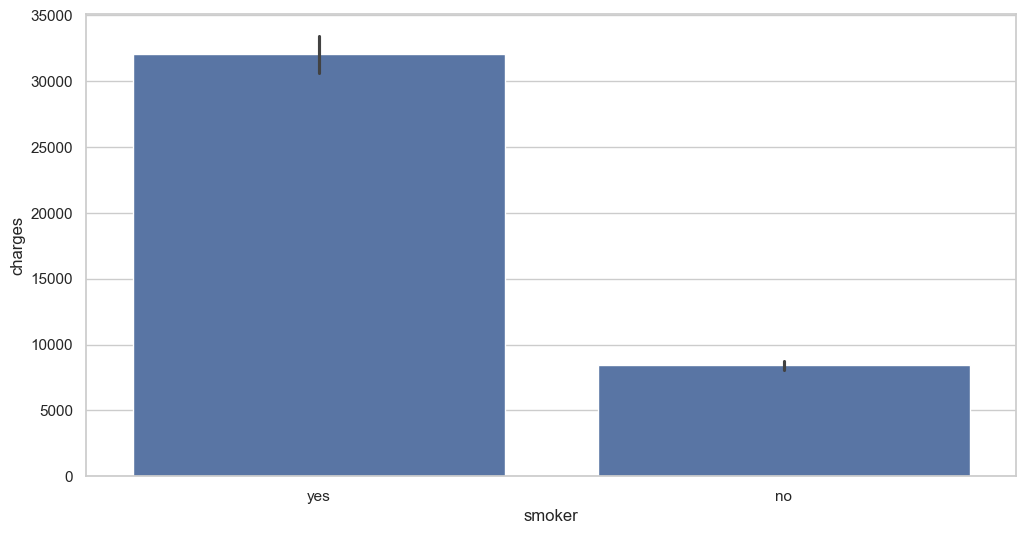

In [44]:
sns.barplot(data=medical_df, x='smoker', y='charges')

In [45]:
smoker_codes = {'yes': 1, 'no': 0}
medical_df['smoker_code'] = medical_df.smoker.map(smoker_codes)

In [46]:
medical_df.charges.corr(medical_df.smoker_code)

0.7872514304984771

In [47]:
sex_codes = {'female': 0, 'male': 1}
medical_df['sex_code'] = medical_df.sex.map(sex_codes)

In [48]:
# use one hot encoding for region
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
enc.fit(medical_df[['region']])
region_encoded = enc.transform(medical_df[['region']]).toarray()
medical_df[['northeast', 'northwest', 'southeast', 'southwest']] = region_encoded

In [49]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


### Standardizing

In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(medical_df[['age', 'bmi', 'children']])

StandardScaler()

In [56]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [57]:
scaler.scale_

array([14.04470904,  6.09590764,  1.20504217])

In [58]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

In [60]:
scaled_inputs = scaler.transform(medical_df[['age', 'bmi', 'children']])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [61]:
cat_cols = ['smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
categorical_inputs = medical_df[cat_cols]
categorical_inputs

,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,1,0,0.0,0.0,0.0,1.0
1,0,1,0.0,0.0,1.0,0.0
2,0,1,0.0,0.0,1.0,0.0
3,0,1,0.0,1.0,0.0,0.0
4,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...
1333,0,1,0.0,1.0,0.0,0.0
1334,0,0,1.0,0.0,0.0,0.0
1335,0,0,0.0,0.0,1.0,0.0
1336,0,0,0.0,0.0,0.0,1.0


In [63]:
inputs = np.concatenate((scaled_inputs,categorical_inputs), axis=1)
targets = medical_df['charges']

model = LinearRegression().fit(inputs, targets)
predicted_charges = model.predict(inputs)
rmse = np.sqrt(mean_squared_error(targets, predicted_charges))
rmse

6041.6796511744515